# Lab-10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Data Loading

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:17<00:00, 81.6MB/s]
100% 1.06G/1.06G [00:17<00:00, 64.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential (Architecture provider)
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

## Model Building
### CNN
CNN stands for Convolutional Neural Network. CNNs are a class of deep neural networks most commonly applied to analyzing visual imagery.

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

### Sigmoid
The sigmoid function, also known as the logistic function, is a common activation function used in neural networks. It squashes the input values between 0 and 1, which makes it useful for binary classification tasks where you want to predict probabilities.
### relu
ReLU is a simple and widely used activation function. It replaces all negative input values with zero and leaves positive values unchanged.
### tanh
Tanh is another activation function similar to the sigmoid function, but it squashes the input values between -1 and 1. Like the sigmoid function, tanh is also used in neural networks, especially in hidden layers.
### adam(Optimizer)
Adam is an optimization algorithm used to update the weights of the neural network based on training data. It combines ideas from RMSProp (Root Mean Square Propagation) and Momentum methods.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Accuracy and evaluation

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 101ms/step - loss: 1.2406 - accuracy: 0.6008 - val_loss: 0.7118 - val_accuracy: 0.6172
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5708 - accuracy: 0.7003 - val_loss: 0.5799 - val_accuracy: 0.7008
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4940 - accuracy: 0.7627 - val_loss: 0.4793 - val_accuracy: 0.7690
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4215 - accuracy: 0.8114 - val_loss: 0.6388 - val_accuracy: 0.6928
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3600 - accuracy: 0.8437 - val_loss: 0.5312 - val_accuracy: 0.7634
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2833 - accuracy: 0.8809 - val_loss: 0.6929 - val_accuracy: 0.7116
Epoch 7/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2140 - accuracy: 0.9143 - val_loss: 0.4933 - val_ac

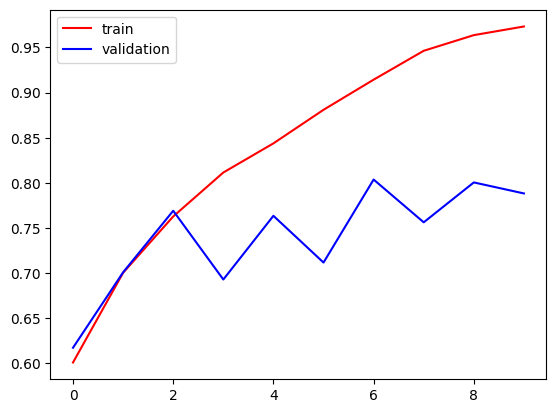

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

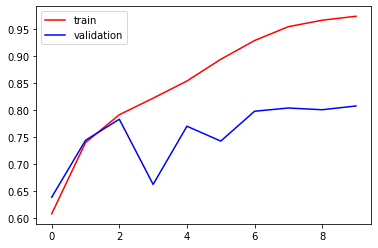

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

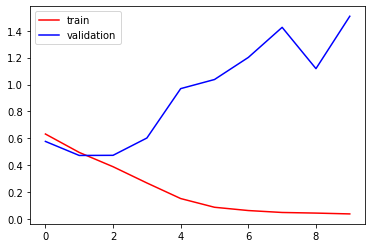

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

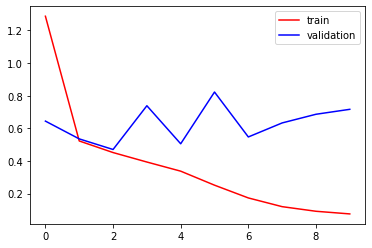

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpg')

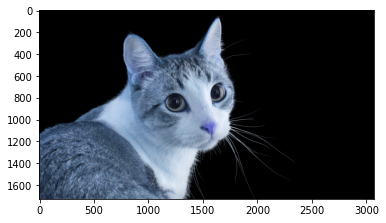

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(1728, 3072, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

array([[0.]], dtype=float32)